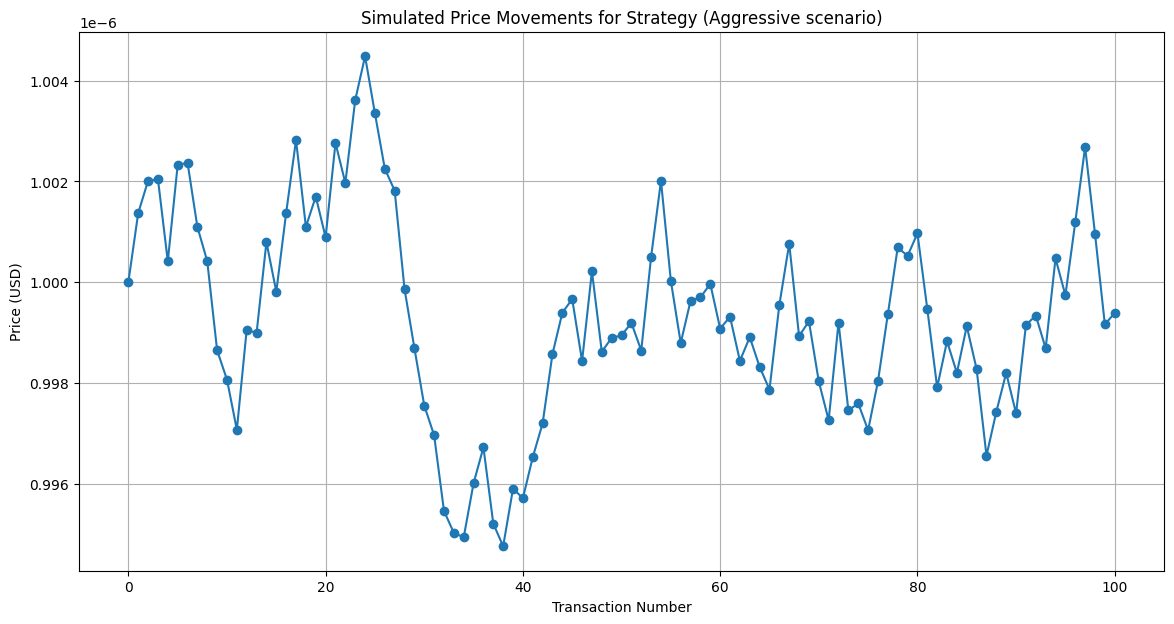

9.993888367365005e-07

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to calculate the new price based on the transaction size and current liquidity
def calculate_new_price(current_price, transaction_size, is_buy):
    # Define liquidity zones
    if current_price < 0.00001:
        liquidity = 50  # in billions of tokens, first range
    else:
        liquidity = 850  # in billions of tokens, second range
    
    # Convert liquidity to a usable scale (from billions)
    liquidity *= 1e9

    # Price impact calculation, simplified model
    # Assuming the price impact is proportional to the ratio of transaction size to liquidity
    price_impact = transaction_size / liquidity
    
    # Apply the price impact
    if is_buy:
        new_price = current_price * (1 + price_impact)
    else:
        new_price = max(current_price * (1 - price_impact), 0.0000001)  # prevent price from dropping below minimum

    return new_price

# Initial settings
current_price = 0.000001
#np.random.seed(42)  # for reproducible results

# Simulate a series of 100 random transactions
transactions = np.random.randint(1000000, 100000000, size=100)  # transaction sizes between 1 and 1 million tokens
transaction_types = np.random.choice([True, False], size=100)  # buy (True) or sell (False)

prices = [current_price]
for transaction_size, is_buy in zip(transactions, transaction_types):
    current_price = calculate_new_price(current_price, transaction_size, is_buy)
    prices.append(current_price)

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(prices, marker='o')
plt.xlabel('Transaction Number')
plt.ylabel('Price (USD)')
plt.title('Simulated Price Movements for Strategy (Aggressive scenario)')
plt.grid(True)
plt.show()

prices[-1]  # Show the final price after all transactions
